
# Binary Prediction of Poisonous Mushrooms 
### Group Members: Matheus Liotti, Rafael Campeão, Rodrigo de Sousa
## Supervised Learning - IART 2nd Assignment

The second practical assignment of IART focuses on the application of Supervised Learning techniques in
the context of classification problems. The goal is to develop and evaluate machine learning models capable
of learning from labeled data to make accurate predictions regarding a specific target variable (or concept).

## Machine Learning Problem
In this notebook, we will work with a dataset containing information about various mushroom species to predict whether a mushroom is poisonous or edible, in a binary classification problem. Using this dataset, we will explore different classification algorithms and evaluate their performance in predicting the target variable.


### 4. Load Libraries

In [36]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
import time

### 5. First Model - Decision Tree Classifier
Decision Trees are a popular and interpretable classification algorithm that can handle both categorical and numerical data. They work by recursively splitting the data based on feature values to create a tree-like structure, where each leaf node represents a class label.

In [ ]:
# Load the dataset
df = pd.read_csv('data/balanced_train.csv')


df = df.drop(columns=['id'])

# Feature/Target Split
X = df.drop("class", axis=1)
y = df["class"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=420
)

# Use OrdinalEncoder (faster and scalable for Decision Trees)
categorical_features = ['cap-shape','cap-surface','cap-color','does-bruise-or-bleed','gill-attachment','gill-spacing','gill-color','stem-surface','stem-color','has-ring','ring-type','habitat','season']


preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), categorical_features)
    ],
    remainder='passthrough'
)

# Define Pipeline with a Decision Tree
pipeline_dt = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("classifier", DecisionTreeClassifier(random_state=420))
    ]
)

# Train the Model (timed)
start_train = time.time()
pipeline_dt.fit(X_train, y_train)
end_train = time.time()
print(f"\nTraining completed in {end_train - start_train:.3f} seconds")

# Test the Model (timed)
start_test = time.time()
y_pred = pipeline_dt.predict(X_test)
end_test = time.time()
print(f"\nTesting completed in {end_test - start_test:.3f} seconds")

# Evaluation
print(f"\nAccuracy: {(accuracy_score(y_test, y_pred)*100):.2f}%")


Training completed in 57.636 seconds

Testing completed in 2.254 seconds

Accuracy: 97.89%


### 5.1 Classification Reports, Confusion Matrix and Feature Importance

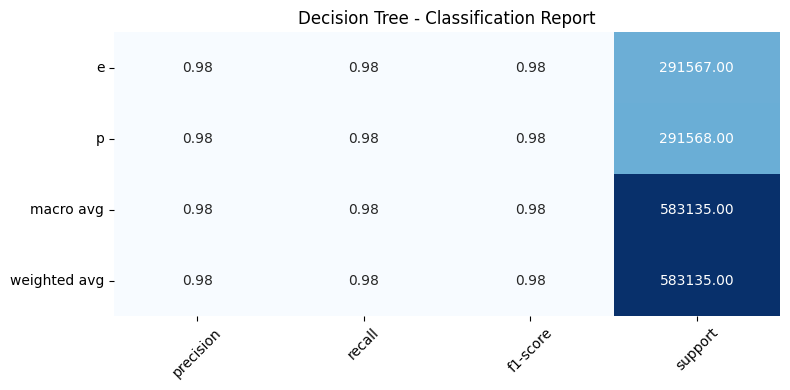

In [43]:
# Get the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame (drop "accuracy" which isn't per-class)
report_df = pd.DataFrame(report_dict).transpose()

# Optional: keep only relevant rows
report_df = report_df.loc[["e", "p", "macro avg", "weighted avg"]]

# Round values for display
report_df = report_df.round(2)

# Plot as a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:, :4], annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Decision Tree - Classification Report")
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

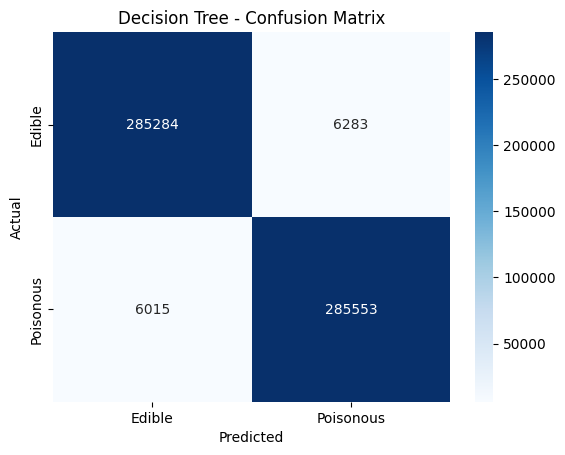

In [44]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", 
            xticklabels=["Edible", "Poisonous"], 
            yticklabels=["Edible", "Poisonous"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

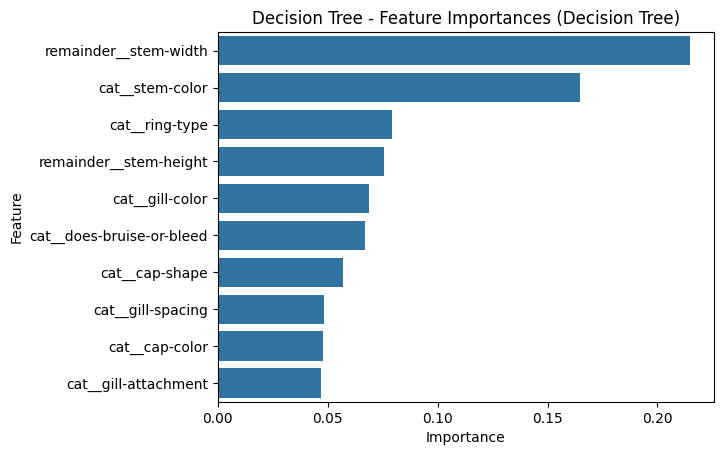

In [46]:
# Feature Importance
importances = pipeline_dt.named_steps["classifier"].feature_importances_
feature_names = pipeline_dt.named_steps["preprocessing"].get_feature_names_out()
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values("Importance", ascending=False).head(10)

sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Decision Tree - Feature Importances (Decision Tree)")
plt.show()

### 6. Second Model -  Random Forest Classifier
Random Forest is an ensemble learning method that combines multiple decision trees to improve classification accuracy and reduce overfitting. It works by training multiple decision trees on different subsets of the data and aggregating their predictions.

In [61]:
df = pd.read_csv('data/balanced_train.csv')


df = df.drop(columns=['id'])

# Split Features and Target
X = df.drop("class", axis=1)
y = df["class"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=420
)

# Preprocessing (Ordinal Encoding for categorical features)
categorical_features = ['cap-shape','cap-surface','cap-color','does-bruise-or-bleed','gill-attachment','gill-spacing','gill-color','stem-surface','stem-color','has-ring','ring-type','habitat','season']

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), categorical_features)
    ],
    remainder='passthrough'
)

# Define Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    random_state=420,
    n_jobs=-1
)

pipeline_rf = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("classifier", rf_model)
    ]
)

# Train the Model (with timing)
start_train = time.time()
pipeline_rf.fit(X_train, y_train)
end_train = time.time()
print(f"\nTraining completed in {end_train - start_train:.2f} seconds")

# Test the Model (with timing)
start_test = time.time()
y_pred_rf = pipeline_rf.predict(X_test)
end_test = time.time()
print(f"\nTesting completed in {end_test - start_test:.4f} seconds")

# Evaluation
print(f"\nAccuracy: {(accuracy_score(y_test, y_pred_rf)*100):.2f}%")


Training completed in 98.11 seconds

Testing completed in 3.0858 seconds

Accuracy: 98.58%


### 6.1 Classification Reports, Confusion Matrix and Feature Importance

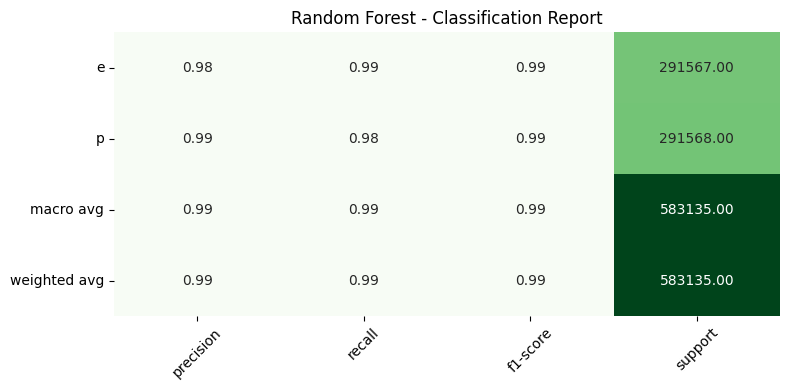

In [62]:
# Get the classification report as a dictionary
report_dict = classification_report(y_test, y_pred_rf, output_dict=True)

# Convert to DataFrame (drop "accuracy" which isn't per-class)
report_df = pd.DataFrame(report_dict).transpose()

# Optional: keep only relevant rows
report_df = report_df.loc[["e", "p", "macro avg", "weighted avg"]]

# Round values for display
report_df = report_df.round(2)

# Plot as a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:, :4], annot=True, fmt=".2f", cmap="Greens", cbar=False)
plt.title("Random Forest - Classification Report")
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

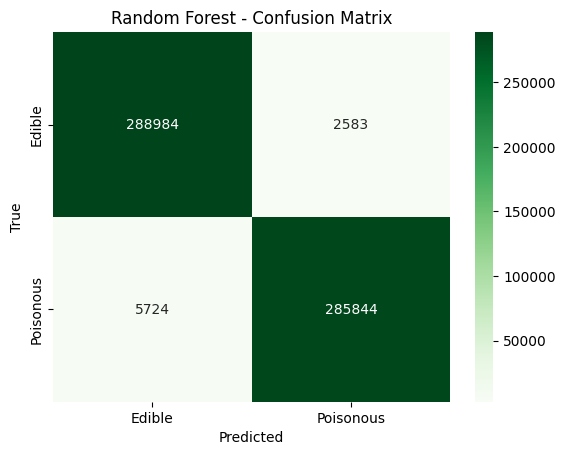

In [63]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Edible", "Poisonous"],
            yticklabels=["Edible", "Poisonous"])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

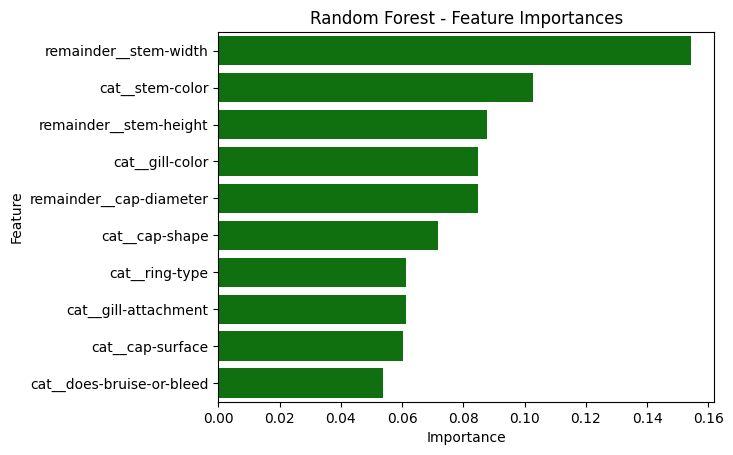

In [64]:
# Feature Importance
importances = pipeline_rf.named_steps["classifier"].feature_importances_
feature_names = pipeline_rf.named_steps["preprocessing"].get_feature_names_out()
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values("Importance", ascending=False).head(10)

sns.barplot(x="Importance", y="Feature", data=importance_df, color="green")
plt.title("Random Forest - Feature Importances")
plt.show()

### 7. Third Model -  Gaussian Naive Bayes
Gaussian Naive Bayes is a probabilistic classification algorithm based on Bayes' Theorem. It assumes that features are conditionally independent given the class label and follows a Gaussian (normal) distribution for continuous data. GaussianNB calculates the probability of each class and selects the one with the highest likelihood, making it suitable for problems involving continuous numeric features.

In [65]:

df = pd.read_csv('data/balanced_train.csv')

df = df.drop(columns=['id'])

for column in df.select_dtypes(include=['object']).columns:
    df[column] = LabelEncoder().fit_transform(df[column])

# Feature/Target Split
X = df.drop("class", axis=1)
y = df["class"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=420
)


model = GaussianNB()


# Train the Model (timed)
start_train = time.time()
model.fit(X_train, y_train)
end_train = time.time()
print(f"\nTraining completed in {end_train - start_train:.3f} seconds")

# Test the Model (timed)
start_test = time.time()
y_pred_nb=model.predict(X_test)
end_test = time.time()
print(f"\nTesting completed in {end_test - start_test:.3f} seconds")

# Evaluation
print(f"\nAccuracy: {(accuracy_score(y_test, y_pred_nb)*100):.2f}%")


Training completed in 0.809 seconds

Testing completed in 0.264 seconds

Accuracy: 65.31%


### 7.1 Classification Reports, Confusion Matrix and Feature Importance

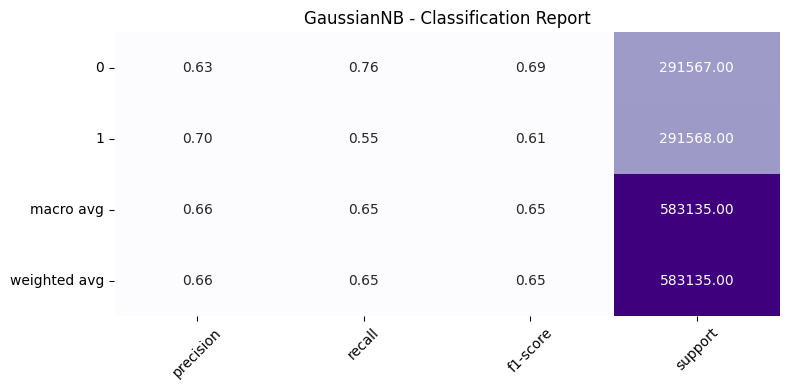

In [52]:
# Get the classification report as a dictionary
report_dict = classification_report(y_test, y_pred_nb, output_dict=True)

# Convert to DataFrame (drop "accuracy" which isn't per-class)
report_df = pd.DataFrame(report_dict).transpose()

# Optional: keep only relevant rows
report_df = report_df.loc[["0", "1", "macro avg", "weighted avg"]]

# Round values for display
report_df = report_df.round(2)

# Plot as a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:, :4], annot=True, fmt=".2f", cmap="Purples", cbar=False)
plt.title("GaussianNB - Classification Report")
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

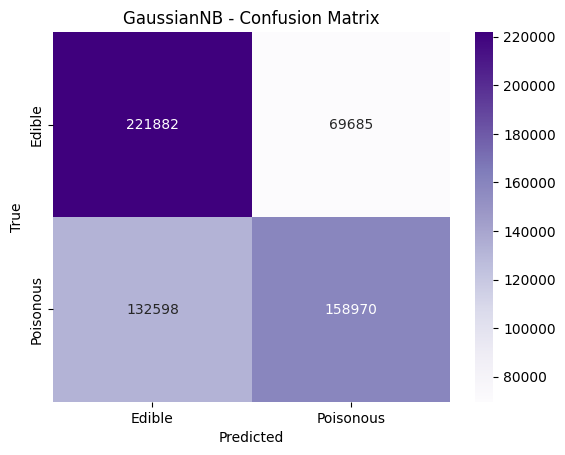

In [53]:
# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Purples",
            xticklabels=["Edible", "Poisonous"],
            yticklabels=["Edible", "Poisonous"])
plt.title("GaussianNB - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### 8. Fourth Model -  Gradient Boosting Classifier
Gradient Boosting Classifier is an ensemble learning method that builds multiple weak learners (decision trees) sequentially. Each tree corrects the errors of the previous ones, improving accuracy by minimizing residuals. The model optimizes using a gradient descent algorithm, making it highly effective for classification tasks.

In [66]:
df = pd.read_csv("data/balanced_train.csv")
df = df.drop(columns=['id'])
X = df.drop(columns=["class"])  
y = df["class"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=420)

categorical_features = ['cap-shape','cap-surface','cap-color','does-bruise-or-bleed','gill-attachment','gill-spacing','gill-color','stem-surface','stem-color','has-ring','ring-type','habitat','season']

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), categorical_features)
    ],
    remainder='passthrough'
)


# Train GBM model
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)


pipeline_gbm=Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("classifier", gbm_model)
    ]
    
)
# Train the Model (with timing)
start_train = time.time()
pipeline_gbm.fit(X_train, y_train)
end_train = time.time()
print(f"\nTraining completed in {end_train - start_train:.2f} seconds")

# Test the Model (with timing)
start_test = time.time()
y_pred_gbm = pipeline_gbm.predict(X_test)
end_test = time.time()
print(f"\nTesting completed in {end_test - start_test:.4f} seconds")

# Evaluation
print(f"\nAccuracy: {(accuracy_score(y_test, y_pred_gbm)*100):.2f}%")



Training completed in 561.87 seconds

Testing completed in 3.4623 seconds

Accuracy: 92.72%


### 8.1 Classification Reports, Confusion Matrix and Feature Importance

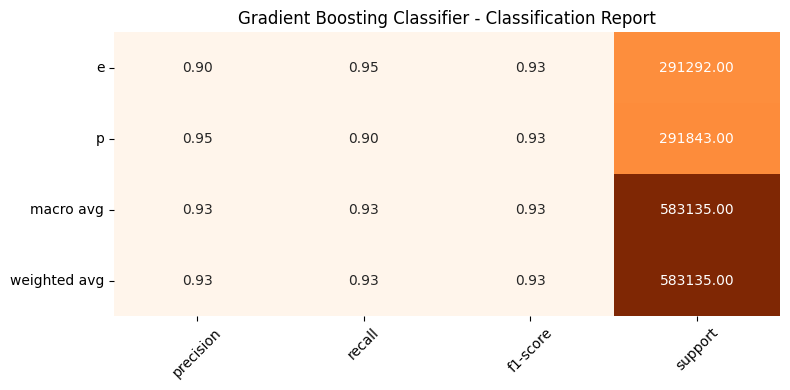

In [67]:
# Get the classification report as a dictionary
report_dict = classification_report(y_test, y_pred_gbm, output_dict=True)

# Convert to DataFrame (drop "accuracy" which isn't per-class)
report_gbm = pd.DataFrame(report_dict).transpose()

# Optional: keep only relevant rows
report_gbm = report_gbm.loc[["e", "p", "macro avg", "weighted avg"]]

# Round values for display
report_gbm = report_gbm.round(2)

# Plot as a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(report_gbm.iloc[:, :4], annot=True, fmt=".2f", cmap="Oranges", cbar=False)
plt.title("Gradient Boosting Classifier - Classification Report")
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

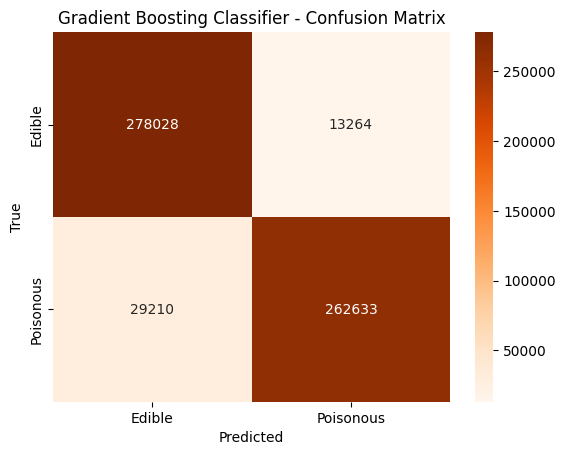

In [68]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_gbm)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["Edible", "Poisonous"],
            yticklabels=["Edible", "Poisonous"])
plt.title("Gradient Boosting Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

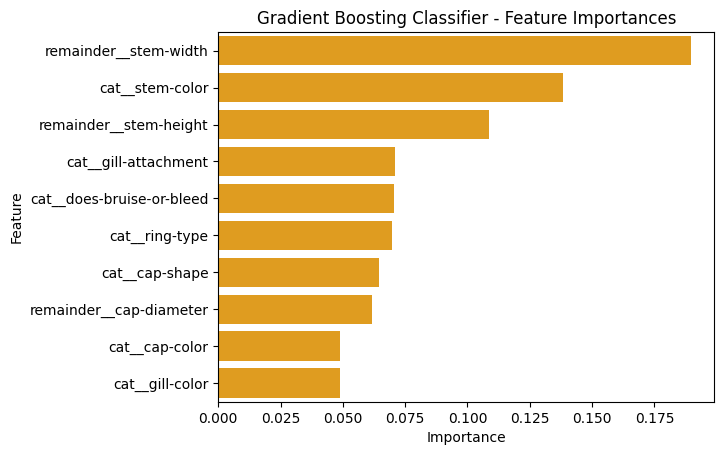

In [69]:
# Feature Importance
importances = pipeline_gbm.named_steps["classifier"].feature_importances_
feature_names = pipeline_gbm.named_steps["preprocessing"].get_feature_names_out()
importance_gbm = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_gbm = importance_gbm.sort_values("Importance", ascending=False).head(10)

sns.barplot(x="Importance", y="Feature", data=importance_gbm, color="orange")
plt.title("Gradient Boosting Classifier - Feature Importances")
plt.show()

### 9. Fifth Model -  Cat Boost Classifier
CatBoost Classifier is a gradient boosting algorithm optimized for categorical data. Unlike traditional models, it natively handles categorical features without requiring explicit encoding. Using ordered boosting and permutation-based feature importance, CatBoost reduces overfitting while delivering high performance.

In [79]:

df = pd.read_csv("data/balanced_train.csv")
df = df.drop(columns=['id'])
X = df.drop(columns=["class"])  
y = df["class"]



# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=420)

categorical_features = ['cap-shape','cap-surface','cap-color','does-bruise-or-bleed','gill-attachment','gill-spacing','gill-color','stem-surface','stem-color','has-ring','ring-type','habitat','season']

catboost_model = CatBoostClassifier(iterations=250, learning_rate=0.1, depth=5, verbose=0,cat_features=categorical_features)

# Define pipeline
pipeline_cb = Pipeline(
    steps=[
        ("classifier", catboost_model)  # No need for preprocessing categorical features manually
    ]
)

# Train the Model (with timing)
start_train = time.time()
pipeline_cb.fit(X_train, y_train) 
end_train = time.time()
print(f"\nTraining completed in {end_train - start_train:.2f} seconds")

# Test the Model (with timing)
start_test = time.time()
y_pred_cb = pipeline_cb.predict(X_test)
end_test = time.time()
print(f"\nTesting completed in {end_test - start_test:.4f} seconds")

# Evaluation
print(f"\nAccuracy: {accuracy_score(y_test, y_pred_cb)*100:.2f}%")


Training completed in 397.84 seconds

Testing completed in 6.0501 seconds

Accuracy: 98.65%


### 9.1 Classification Reports, Confusion Matrix and Feature Importance

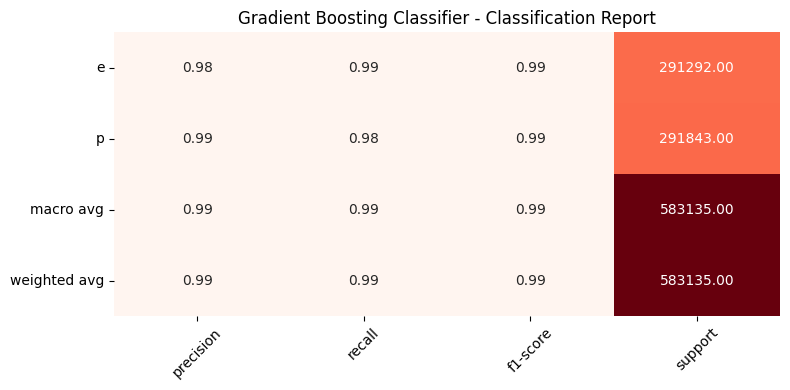

In [81]:
# Get the classification report as a dictionary
report_dict = classification_report(y_test, y_pred_cb, output_dict=True)

# Convert to DataFrame (drop "accuracy" which isn't per-class)
report_cb = pd.DataFrame(report_dict).transpose()

# Optional: keep only relevant rows
report_cb = report_cb.loc[["e", "p", "macro avg", "weighted avg"]]

# Round values for display
report_cb = report_cb.round(2)

# Plot as a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(report_cb.iloc[:, :4], annot=True, fmt=".2f", cmap="Reds", cbar=False)
plt.title("Gradient Boosting Classifier - Classification Report")
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

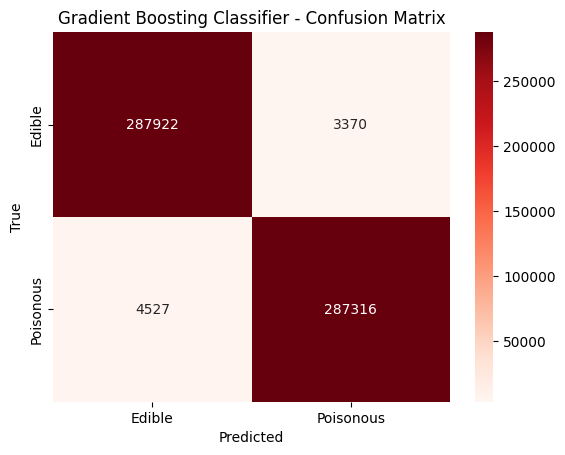

In [82]:
# Confusion Matrix
cm_cb = confusion_matrix(y_test, y_pred_cb)
sns.heatmap(cm_cb, annot=True, fmt="d", cmap="Reds",
            xticklabels=["Edible", "Poisonous"],
            yticklabels=["Edible", "Poisonous"])
plt.title("Gradient Boosting Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

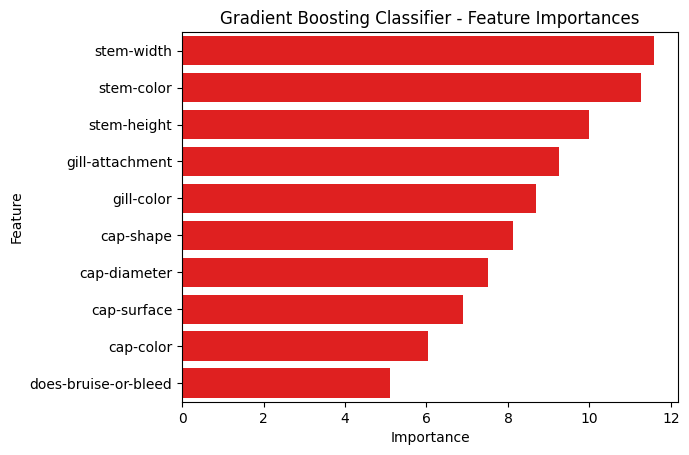

In [83]:
# Feature Importance
importances = pipeline_cb.named_steps["classifier"].feature_importances_
feature_names = X.columns
importance_cb = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_cb = importance_cb.sort_values("Importance", ascending=False).head(10)

sns.barplot(x="Importance", y="Feature", data=importance_cb, color="red")
plt.title("Gradient Boosting Classifier - Feature Importances")
plt.show()